## EE 242 Lab 1b – Modifying Signals - Time Scaling + Time Shift

**Anna Petrbokova, Leonard Paya, Henry Adams, Grace Hwang, Team AA4**

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, and matplotlib.pyplot.  

In [19]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib inline
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

from IPython.display import Audio

# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will continue to work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals. This is a 1 week lab. 

## Lab 1b turn in checklist

Lab 1b Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF (if your browser crashes while trying to export, download as html instead**




## Assignment 3 -- Time Scaling Audio Signals 

This assignment will have four parts, A-D, each of which should be indicated with comments.  

**A.**  Run the timescale function (should be in its own cell) below. Also read the train.wav file as in Lab 1A.

**B.**  Use the timescale function to obtain w(t)=$x_1(2t)$ and v(t)=$x_1(0.5t)$  
    **a.** Create w(t) using a=2 and store the outputs of the timescale function as w and t_w.  
    **b.** Create v(t) using a=0.5 and store the outputs of the timescale function as v and t_v.  
    **c.** Create a time-reversed version of the signal z(t)=$x_1(-t)$ by reversing the order of elements in the sequence.  In order to plot in parallel with other signals, use the time vector $t_z$ = $t_{x_1}$.  
          *Note: When trying to play z(t), you might get a C-contiguous error. To fix this, use z(t) = np.ascontiguousarray(z(t))*.  
    **d.** Save the resulting signal to a wav file. 

**C.** Load a figure and plot the four signals (x1, w, v, and z) using a 4x1 subplot. Adjust the x and y axis limits to have the same ranges in both plots. Be sure to title the plots and label axes appropriately. For the time axis, you should plot time in sec. Do not use grids on the subplots. Adjust the spacing to avoid overlap. If you have implemented the code correctly, the figure should look something like this. 
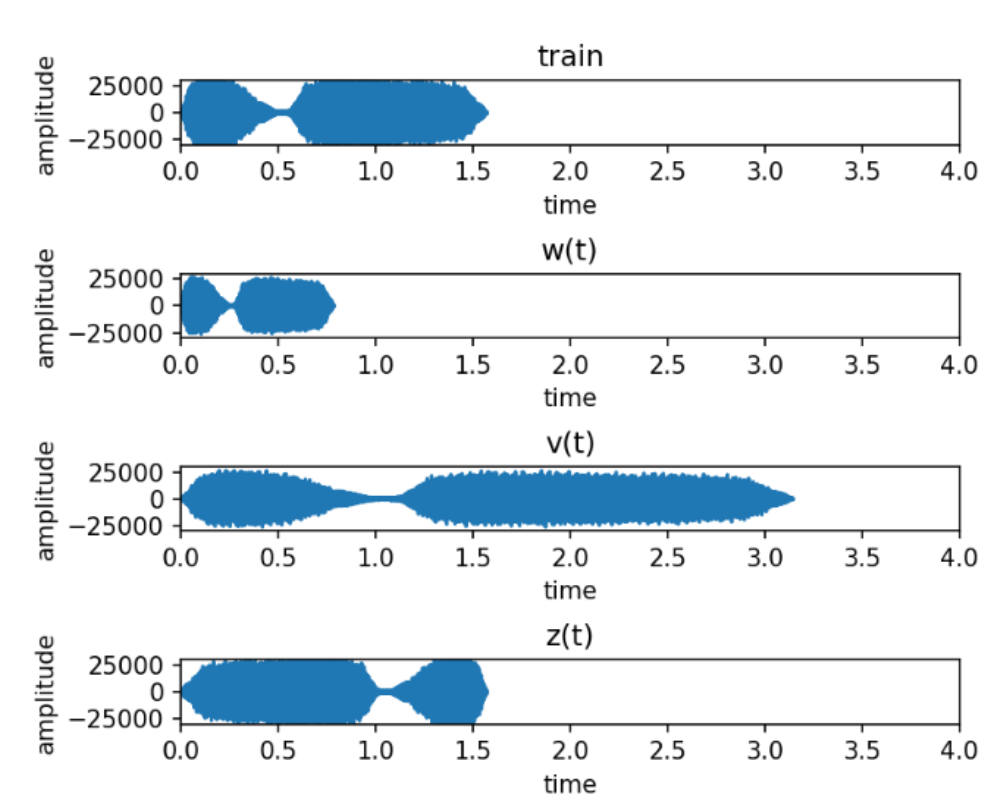

**D.** Read in the signals you created and play them to verify that they sound different based on what you would expect from these transformations. 

In [20]:
# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x, fs, a):
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x.astype(float),d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y.astype("int16"),t

## NOTICE: There is a current bug with scipy.signal that requires casting the input signal to a non-int16/int32 type
## NOTICE: Must cast the array as another datatype, then re-cast back into int16 to play using IPython

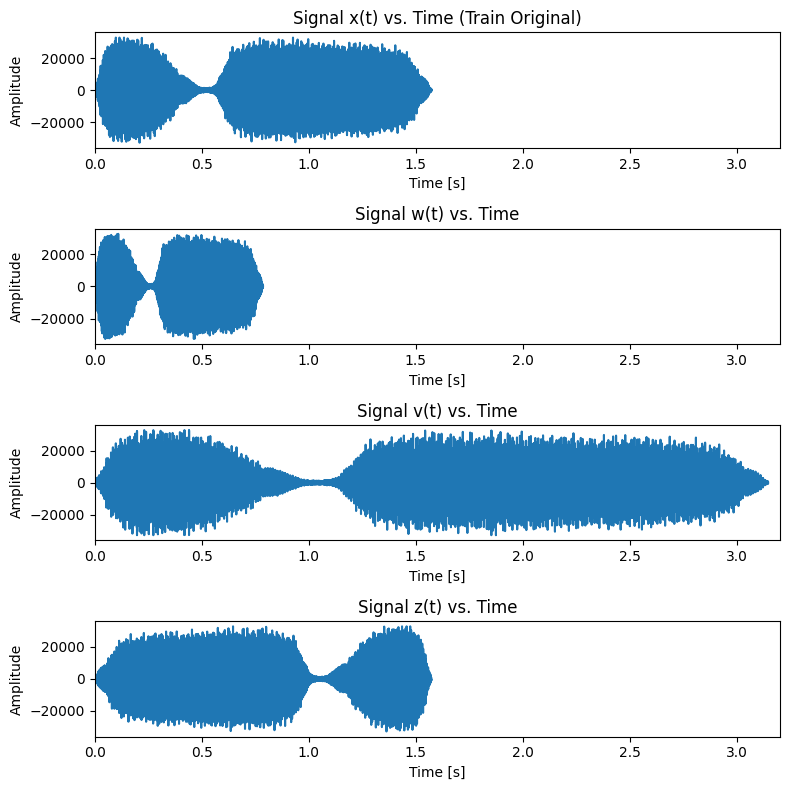

In [21]:
# Assignment 1.3 Time Scaling Audio Signals

# Part A
# TODO: Code that solves A
# Read the train.wav file
samplerate, data = wav.read('train32.wav')

data = data.astype(np.float32)
x, t_x = timescale(data, samplerate, 1)

# Part B
# TODO: Code that solves B
# Apply the timescale function with a=0.5 and a=2 on x(t) to create w(t) and v(t)

w, t_w = timescale(data, samplerate, 2)
v, t_v = timescale(data, samplerate, 0.5)

# Reverse the original signal x1(t) to get z(t)

z = x[::-1]

# Save all of them to slow.wav, fast.wav and reverse.wav respectively

wav.write("fast.wav", samplerate, w.astype(np.int16))
wav.write("slow.wav", samplerate, v.astype(np.int16))
wav.write("reverse.wav", samplerate, z.astype(np.int16))

# Part C
# TODO: Code that solves C
# Plot the figures in a proper manner

length = len(v) // samplerate

t = np.arange(0, length, 1/samplerate)

fig = plt.figure(2, figsize=(8,8))

# Plots original plot
plt.subplot(411)
plt.plot(t_x, x)
plt.title("Signal x(t) vs. Time (Train Original)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0,3.2)

# Plots the function sped up
plt.subplot(412)
plt.plot(t_w, w)
plt.title("Signal w(t) vs. Time")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0,3.2)

# Plots the functions slowed down
plt.subplot(413)
plt.plot(t_v, v)
plt.title("Signal v(t) vs. Time")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0,3.2)

# plots the function time reversed
plt.subplot(414)
plt.plot(t_x, z)
plt.title("Signal z(t) vs. Time")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0,3.2)

fig.tight_layout()

plt.show()
# Part D
# TODO: Code that solves D
# Read and play the four files using IPython package as before.

display(Audio(x, rate=samplerate))
display(Audio(v, rate=samplerate))
display(Audio(w, rate=samplerate))
display(Audio(z, rate=samplerate))


###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?

We would expect there to be 4 figures each with thier own graph, instead of all 4 plots in a single figure. Doing this would cause all the plots to have their own time value ranges, instead of a uniform range that is shared between all plots.

## Assignment 4 -- Time Shift Operations

We will now implement and test a timeshift function. This assignment will have four parts, A-D, each of which should be indicated with comments, following the guidelines in the Lab 1 template.  

**A.**  Write a function called timeshift that takes as input: a signal x, the sampling frequency $f_s$ (in Hz), and a time shift $t_0$ (in seconds). The function should implement $y(t) = x(t+t_0)$ and produce as output the portion of the shifted signal starting at time 0. Assume that the original signal has value zero outside the time window. Your function should: 

**1.** Find the integer shift $n_0$ given $t_0$ and $f_s$.  
**2.** Use conditional control that tests whether the time shift is positive or negative  
**2.1.** For a time delay, create y by moving the values of the samples to the right. (if $t_0$ is negative, then move the signal to the right)  
**2.2.** For a time advance, create y moving the values of the samples to the left. (if $t_0$ is positive, then move the signals to the left)  
**3.** Based on the length of the final signal and the sampling frequency, create a time vector that corresponds to the output signal length, starting at 0.   
**4.** Return the new signal and the time vector. Save the function it in its own cell, as indicated in the Lab 1 template. 

**B.** Use the function timeshift to create x1(t+0.5) and x1(t-2). Plot the shifted signals with the original in a 3x1 plot: x1(t), x1(t+0.5), and x1(t-2). The x-axis should be between 0 and 4 for all three plots. Label axes and title the plot.

**C.** Play all three signals. 

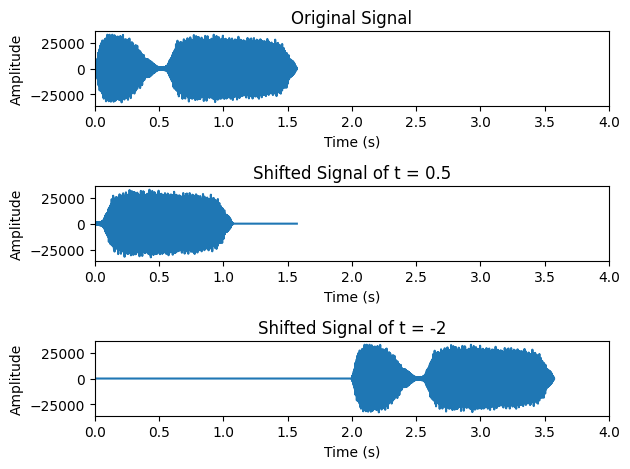

In [22]:
import scipy.io.wavfile as wav

# Part A
# TODO: Code that solves A

def timeshift(x, fs, t_0):
    # Calculate n0 to nearest whole number
    n_0 = -1 * int(round(t_0 * fs))
    #n_0 = int(t_0 * fs)
    if(n_0>=0):
        #Write the code for positive values of n_0
        #join two strings together where since it is a time advance, move samples to left and adds zeros for padding at the end
        y = np.concatenate((np.zeros(n_0), x))
        t = np.arange(0,len(y),1)*(1.0/fs)
        
    else:
        #Write the code for negative values of n_0
        #join two strings together where since it is a time delay, move samples to right. shifted values is padded with zeros at the start (OG length)
        y = np.concatenate((x, np.zeros(-n_0)))
        t = np.arange(n_0,len(y)+n_0,1)*(1.0/fs)
        y = y[-1 * n_0:]
        t = t[-1 * n_0:]

    #t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t


# Part B
# TODO: Code that solves B
# Use the timeshift function implemented above with values of t_0 = 0.5 and -2. Save the signals.
fs, x = wav.read('train32.wav')

# Time shift functions by outlined amount.
x, t = timeshift(x, fs, 0)
x1, t1 = timeshift(x, fs, 0.5)
x2, t2 = timeshift(x, fs, -2)

#save shifted signals
wav.write('shifted_05.wav', fs, x1.astype(np.int16))
wav.write('shifted_minus2.wav', fs, x2.astype(np.int16))

# Plot the signals properly with the correct x-axis.
plt.figure()
#plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
plt.plot(t, x)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 4)

plt.subplot(3,1,2)
plt.plot(t1, x1)
plt.title('Shifted Signal of t = 0.5')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 4)

plt.subplot(3,1,3)
plt.plot(t2, x2)
plt.title('Shifted Signal of t = -2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 4)

plt.tight_layout()
# Part C
# TODO: Code that solves C
# Use the IPython library to play the signals
from IPython.display import Audio
display(Audio(x, rate=fs))
display(Audio(x1, rate=fs))
display(Audio(x2, rate=fs))

### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.

The case where the output is the original signal when the shift is zero is handeled by if(n_0>=0) condition in the timeshift function. For the second case, when we plug in a larger value for t_0, we can see that the signals are pushed out of view on the graph. However it is not completely nonzero and the original signal is still at the end. Therefore, a better implementation would be to return zero arrays when the shift in advance is bigger than the original signal.